In [ ]:
1

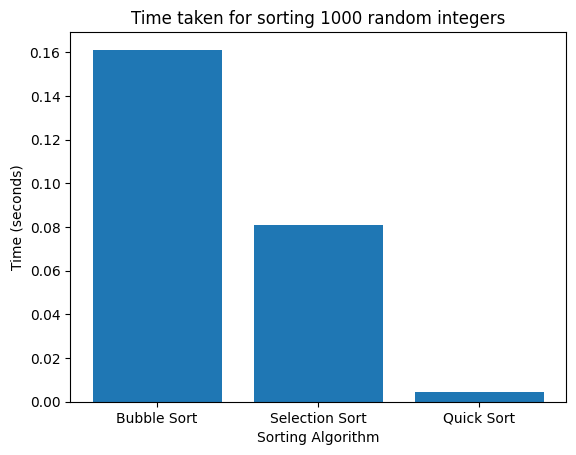

In [1]:
import random
import time
import matplotlib.pyplot as plt

def bubble_sort(arr):
    n = len(arr)
    for i in range(n):
        for j in range(0, n-i-1):
            if arr[j] > arr[j+1]:
                arr[j], arr[j+1] = arr[j+1], arr[j]

def selection_sort(arr):
    n = len(arr)
    for i in range(n):
        min_idx = i
        for j in range(i+1, n):
            if arr[j] < arr[min_idx]:
                min_idx = j
        arr[i], arr[min_idx] = arr[min_idx], arr[i]

def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1
    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]
    arr[i+1], arr[high] = arr[high], arr[i+1]
    return i + 1

def quick_sort(arr, low, high):
    if low < high:
        pi = partition(arr, low, high)
        quick_sort(arr, low, pi - 1)
        quick_sort(arr, pi + 1, high)

# Generate 1000 random integers between 1 and 10000
random_numbers = [random.randint(1, 10000) for _ in range(1000)]

# Copy the random numbers for each sorting algorithm
bubble_numbers = random_numbers.copy()
selection_numbers = random_numbers.copy()
quick_numbers = random_numbers.copy()

# Measure time taken for Bubble Sort
start_time = time.time()
bubble_sort(bubble_numbers)
bubble_time = time.time() - start_time

# Measure time taken for Selection Sort
start_time = time.time()
selection_sort(selection_numbers)
selection_time = time.time() - start_time

# Measure time taken for Quick Sort
start_time = time.time()
quick_sort(quick_numbers, 0, len(quick_numbers) - 1)
quick_time = time.time() - start_time

# Plotting the results
plt.bar(['Bubble Sort', 'Selection Sort', 'Quick Sort'], [bubble_time, selection_time, quick_time])
plt.title('Time taken for sorting 1000 random integers')
plt.xlabel('Sorting Algorithm')
plt.ylabel('Time (seconds)')
plt.show()


2

In [5]:
import heapq

def print_sorted_lists(sorted_lists):
    heap = []

    # Initialize the heap with the first element from each list along with the index
    for i, lst in enumerate(sorted_lists):
        if lst:  # Check if the list is not empty
            heapq.heappush(heap, (lst[0], i, 0))  # (element, list index, element index)

    while heap:
        val, list_idx, elem_idx = heapq.heappop(heap)
        print(val, end=' ')

        # Move to the next element in the same list if available
        if elem_idx + 1 < len(sorted_lists[list_idx]):
            next_val = sorted_lists[list_idx][elem_idx + 1]
            heapq.heappush(heap, (next_val, list_idx, elem_idx + 1))

# User interface
def main():
    sorted_lists = [
        [10, 20, 30, 40],
        [15, 25, 35],
        [27, 29, 37, 48, 93],
        [32, 33]
    ]

    print("Sorted Lists:")
    for lst in sorted_lists:
        print(lst)

    print("\nSorted elements in all lists:")
    print_sorted_lists(sorted_lists)

if __name__ == "__main__":
    main()



Sorted Lists:
[10, 20, 30, 40]
[15, 25, 35]
[27, 29, 37, 48, 93]
[32, 33]

Sorted elements in all lists:
10 15 20 25 27 29 30 32 33 35 37 40 48 93 

3


In [4]:
import heapq

def find_k_largest_elements(arr, k):
    heap = arr[:k]
    heapq.heapify(heap)

    for num in arr[k:]:
        if num > heap[0]:
            heapq.heappop(heap)
            heapq.heappush(heap, num)

    return sorted(heap, reverse=True)

def main():
    # Get input from the user
    arr = list(map(int, input("Enter the array elements separated by spaces: ").split()))
    k = int(input("Enter the value of K: "))

    # Find the K largest elements
    result = find_k_largest_elements(arr, k)

    # Display the result
    print(f"The {k} largest elements in the array are: {result}")

if __name__ == "__main__":
    main()


Enter the array elements separated by spaces: 8 12 22 65 2 5 3 55 
Enter the value of K: 2
The 2 largest elements in the array are: [65, 55]


4


In [13]:
def max_activities(activities):
    if not activities:
        return []

    # Sort activities based on their finishing times
    sorted_activities = sorted(activities, key=lambda x: x[1])

    # Initialize variables
    max_activities_list = [sorted_activities[0]]
    prev_activity_finish = sorted_activities[0][1]

    # Iterate through sorted activities and select non-overlapping ones
    for activity in sorted_activities[1:]:
        start, finish = activity
        if start >= prev_activity_finish:
            max_activities_list.append(activity)
            prev_activity_finish = finish

    return max_activities_list

# User interface
def main():
    activities = []
    while True:
        activity_str = input("Enter activity as (start_time, finish_time) (or press Enter to stop): ")
        if not activity_str:
            break
        activity = tuple(map(int, activity_str.strip("()").split(',')))
        activities.append(activity)

    print("Input: Following set of activities")
    print(activities)

    max_activities_list = max_activities(activities)
    print("\nOutput:")
    print(max_activities_list)

if __name__ == "__main__":
    main()





Enter activity as (start_time, finish_time) (or press Enter to stop): (1,4)
Enter activity as (start_time, finish_time) (or press Enter to stop): (3,5)
Enter activity as (start_time, finish_time) (or press Enter to stop): (0,6)
Enter activity as (start_time, finish_time) (or press Enter to stop): (5,7)
Enter activity as (start_time, finish_time) (or press Enter to stop): (3,8)
Enter activity as (start_time, finish_time) (or press Enter to stop): (5,9)
Enter activity as (start_time, finish_time) (or press Enter to stop): (6,10)
Enter activity as (start_time, finish_time) (or press Enter to stop): (8,11)
Enter activity as (start_time, finish_time) (or press Enter to stop): (8,12)
Enter activity as (start_time, finish_time) (or press Enter to stop): (2,13)
Enter activity as (start_time, finish_time) (or press Enter to stop): (12,14)
Enter activity as (start_time, finish_time) (or press Enter to stop): 
Input: Following set of activities
[(1, 4), (3, 5), (0, 6), (5, 7), (3, 8), (5, 9), (6,

5


In [14]:
def merge_intervals(intervals):
    if not intervals:
        return []

    # Sort intervals based on start times
    sorted_intervals = sorted(intervals, key=lambda x: x[0])

    merged_intervals = []
    prev_start, prev_end = sorted_intervals[0]

    for start, end in sorted_intervals[1:]:
        if start <= prev_end:  # Overlapping intervals
            prev_end = max(prev_end, end)
        else:
            merged_intervals.append((prev_start, prev_end))
            prev_start, prev_end = start, end

    # Add the last interval
    merged_intervals.append((prev_start, prev_end))

    return merged_intervals

# User interface
def main():
    intervals = []
    print("Enter intervals as (start_time, end_time) separated by commas (or press Enter to stop): ")
    while True:
        interval_str = input()
        if not interval_str:
            break
        interval = tuple(map(int, interval_str.strip("()").split(',')))
        intervals.append(interval)

    print("\nInput intervals:")
    print(intervals)

    merged_intervals = merge_intervals(intervals)
    print("\nNon-overlapping intervals after merging:")
    print(merged_intervals)

if __name__ == "__main__":
    main()


Enter intervals as (start_time, end_time) separated by commas (or press Enter to stop): 
(1,4)
(2,5)
(7,8)
(6,9)


Input intervals:
[(1, 4), (2, 5), (7, 8), (6, 9)]

Non-overlapping intervals after merging:
[(1, 5), (6, 9)]
